In [1]:
# Hyperparameters

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
pd.options.display.max_columns = 10000

/Users/juliamyers/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# load dataframes horror, scifi, thriller, war and animation from letterboxd data

In [4]:
df_horror = pd.read_csv('data/Horror.csv')
df_horror.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435


In [5]:
df_scifi = pd.read_csv('data/SciFi.csv')
df_scifi.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Spider-Man: Into the Spider-Verse,2018.0,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471056,231832,4.4,275,585,330,1923,2178,13916,22153,84260,70990,150869
1,Alien,1979.0,Ridley Scott,117,379337,130733,4.3,145,442,299,1974,1961,13690,17632,60239,38044,81236
2,Captain Marvel,2019.0,"Ryan Fleck,Anna Boden",124,337033,77294,3.2,2696,5803,5852,22166,25424,59095,43511,42337,9313,16662
3,Captain America: The Winter Soldier,2014.0,"Anthony Russo,Joe Russo",136,479385,128919,3.8,803,2739,1700,10378,10092,42585,40745,77448,30175,40600
4,Guardians of the Galaxy Vol. 2,2017.0,James Gunn,137,477059,131595,3.6,1031,3076,2661,14156,16423,61710,56068,79567,20530,27144


In [6]:
df_thriller = pd.read_csv('data/Thriller.csv')
df_thriller.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Parasite,2019.0,Bong Joon-ho,133,539266,283450,4.6,308,427,289,1266,1640,8667,14524,69003,90025,243931
1,Psycho,1960.0,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548
2,Zodiac,2007.0,David Fincher,157,332010,92781,4.0,209,658,530,3354,3933,21210,29126,66992,32046,35479
3,John Wick,2014.0,Chad Stahelski,101,352567,105748,3.8,532,1442,1208,5613,7382,31924,42776,76837,22639,29258
4,Reservoir Dogs,1992.0,Quentin Tarantino,99,386953,125137,4.1,226,598,463,2473,2757,16449,24906,76472,44053,52923


In [7]:
df_war = pd.read_csv('data/War.csv')
df_war.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Inglourious Basterds,2009.0,Quentin Tarantino,153,584639,218416,4.3,424,1085,668,4025,3847,24156,29023,101558,65594,113894
1,Paths of Glory,1957.0,Stanley Kubrick,88,74359,23556,4.3,15,47,48,201,322,1878,3824,13053,12624,14826
2,Fury,2014.0,David Ayer,135,145217,29977,3.6,216,577,731,3230,5035,17210,20721,24578,6229,5697
3,Gone with the Wind,1939.0,"Victor Fleming,George Cukor,Sam Wood",233,90154,17558,3.9,265,536,375,1557,1531,5418,5491,11234,5659,9973
4,The Thin Red Line,1998.0,Terrence Malick,171,78597,18011,4.0,112,308,222,1183,1260,4699,5793,12125,7407,9363


In [8]:
df_animation = pd.read_csv('data/Animation.csv')
df_animation.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Spider-Man: Into the Spider-Verse,2018.0,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471600,232066,4.4,275,585,329,1929,2184,13931,22173,84347,71034,151015
1,Finding Dory,2016.0,"Andrew Stanton,Angus MacLane",97,314142,53703,3.4,596,2015,2265,10899,12850,40274,32828,35851,7063,12065
2,Wreck-It Ralph,2012.0,Rich Moore,101,319694,64101,3.6,301,1052,1026,5811,7991,32348,33237,45608,11007,13740
3,How to Train Your Dragon,2010.0,"Chris Sanders,Dean DeBlois",100,308058,68214,3.9,191,558,473,2938,4053,20622,24824,47324,15769,21894
4,Tangled,2010.0,"Byron Howard,Nathan Greno",100,318687,64472,3.7,278,888,892,4907,6348,25919,25467,39242,11317,21929


In [9]:
# df_horror EDA
# do on each column

In [10]:
df_horror.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,11052,11046.000000,10976,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000
unique,10339,NaN,6826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dr. Jekyll and Mr. Hyde,NaN,David DeCoteau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1997.829712,NaN,83.197883,4344.529406,823.853782,2.810062,52.435215,99.525606,93.569399,234.609482,241.492038,511.017101,422.037821,507.563156,169.017644,214.110297
std,NaN,20.641835,NaN,28.903248,22098.558663,6153.743060,0.461166,237.354295,394.178772,345.956247,888.161944,899.024736,2229.331836,2211.361403,3773.986745,1676.276906,2646.450847
min,NaN,1895.000000,NaN,1.000000,34.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1986.000000,NaN,80.000000,104.000000,10.000000,2.500000,2.000000,5.000000,5.000000,9.000000,8.000000,11.000000,5.000000,3.000000,0.000000,1.000000
50%,NaN,2006.000000,NaN,89.000000,277.000000,31.000000,2.800000,7.000000,13.000000,13.000000,25.000000,24.000000,33.000000,17.000000,11.000000,2.000000,3.000000
75%,NaN,2014.000000,NaN,95.000000,1110.250000,148.000000,3.100000,22.000000,40.000000,41.000000,93.000000,96.000000,157.000000,90.000000,61.000000,12.000000,14.000000


In [11]:
df_horror.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,11046.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000
mean,1997.829712,83.197883,4344.529406,823.853782,2.810062,52.435215,99.525606,93.569399,234.609482,241.492038,511.017101,422.037821,507.563156,169.017644,214.110297
std,20.641835,28.903248,22098.558663,6153.743060,0.461166,237.354295,394.178772,345.956247,888.161944,899.024736,2229.331836,2211.361403,3773.986745,1676.276906,2646.450847
min,1895.000000,1.000000,34.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,80.000000,104.000000,10.000000,2.500000,2.000000,5.000000,5.000000,9.000000,8.000000,11.000000,5.000000,3.000000,0.000000,1.000000
50%,2006.000000,89.000000,277.000000,31.000000,2.800000,7.000000,13.000000,13.000000,25.000000,24.000000,33.000000,17.000000,11.000000,2.000000,3.000000
75%,2014.000000,95.000000,1110.250000,148.000000,3.100000,22.000000,40.000000,41.000000,93.000000,96.000000,157.000000,90.000000,61.000000,12.000000,14.000000
max,2020.000000,608.000000,605132.000000,261668.000000,4.300000,10250.000000,9849.000000,6513.000000,18043.000000,20637.000000,57592.000000,55535.000000,136842.000000,65726.000000,123437.000000


In [12]:
df_horror.info()
# maybe convert object to string? does it matter?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            11052 non-null  object 
 1   year             11046 non-null  float64
 2   director         10976 non-null  object 
 3   running_time     11052 non-null  int64  
 4   views            11052 non-null  int64  
 5   likes            11052 non-null  int64  
 6   avg_rating       11052 non-null  float64
 7   half_star        11052 non-null  int64  
 8   one_star         11052 non-null  int64  
 9   one_half_star    11052 non-null  int64  
 10  two_star         11052 non-null  int64  
 11  two_half_star    11052 non-null  int64  
 12  three_star       11052 non-null  int64  
 13  three_half_star  11052 non-null  int64  
 14  four_star        11052 non-null  int64  
 15  four_half_star   11052 non-null  int64  
 16  five_star        11052 non-null  int64  
dtypes: float64(2

In [13]:
df_horror['title'].nunique()

10339

In [14]:
df_horror.isna().sum()

title               0
year                6
director           76
running_time        0
views               0
likes               0
avg_rating          0
half_star           0
one_star            0
one_half_star       0
two_star            0
two_half_star       0
three_star          0
three_half_star     0
four_star           0
four_half_star      0
five_star           0
dtype: int64

In [15]:
df_horror['title'][df_horror['year'].isna()]

2400                                      President's Day
2448    The Very Best of Ghost Hunters: Vol. 1: Most B...
2454                                        Silent Breath
2506                            The Golden Arm (Michigan)
2638                                                 Shed
2664                                Frozen 2: Even Better
Name: title, dtype: object

In [16]:
df_horror['avg_rating'].mean()

2.8100615273253724

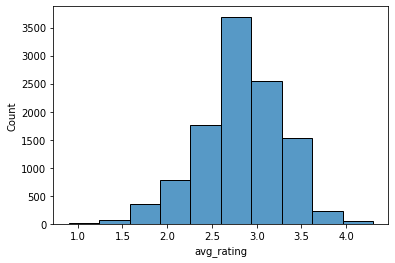

In [17]:
sns.histplot(data = df_horror, x='avg_rating', bins=10)
plt.show()

In [18]:
# scifi distribution and missing values

In [19]:
df_scifi.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,5827,5823.000000,5779,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
unique,5640,NaN,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,Ishirō Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1996.500429,NaN,85.318002,12432.362966,2469.437275,2.898387,109.180196,229.080316,206.881414,579.137635,575.518277,1329.661919,1058.524455,1426.026944,499.093015,740.281105
std,NaN,20.592035,NaN,37.434474,53452.425040,14479.067824,0.511744,617.083835,1102.621337,881.745149,2359.063044,2210.382857,5530.382149,4705.722622,8070.482505,3499.584214,6229.123148
min,NaN,1895.000000,NaN,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1985.000000,NaN,78.000000,119.000000,13.000000,2.600000,1.000000,4.000000,4.000000,9.000000,8.000000,13.000000,6.000000,4.000000,1.000000,1.000000
50%,NaN,2003.000000,NaN,90.000000,333.000000,42.000000,2.900000,6.000000,12.000000,12.000000,26.000000,24.000000,38.000000,21.000000,16.000000,3.000000,5.000000
75%,NaN,2013.000000,NaN,100.000000,1831.000000,239.500000,3.300000,25.000000,52.000000,55.000000,123.500000,137.000000,237.000000,141.000000,110.000000,23.000000,31.000000


In [20]:
df_scifi.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,5823.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,1996.500429,85.318002,12432.362966,2469.437275,2.898387,109.180196,229.080316,206.881414,579.137635,575.518277,1329.661919,1058.524455,1426.026944,499.093015,740.281105
std,20.592035,37.434474,53452.425040,14479.067824,0.511744,617.083835,1102.621337,881.745149,2359.063044,2210.382857,5530.382149,4705.722622,8070.482505,3499.584214,6229.123148
min,1895.000000,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,78.000000,119.000000,13.000000,2.600000,1.000000,4.000000,4.000000,9.000000,8.000000,13.000000,6.000000,4.000000,1.000000,1.000000
50%,2003.000000,90.000000,333.000000,42.000000,2.900000,6.000000,12.000000,12.000000,26.000000,24.000000,38.000000,21.000000,16.000000,3.000000,5.000000
75%,2013.000000,100.000000,1831.000000,239.500000,3.300000,25.000000,52.000000,55.000000,123.500000,137.000000,237.000000,141.000000,110.000000,23.000000,31.000000
max,2020.000000,850.000000,719791.000000,260768.000000,4.400000,26627.000000,41716.000000,25062.000000,49076.000000,32039.000000,71584.000000,63621.000000,129365.000000,70990.000000,150869.000000


In [21]:
df_scifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5827 non-null   object 
 1   year             5823 non-null   float64
 2   director         5779 non-null   object 
 3   running_time     5827 non-null   int64  
 4   views            5827 non-null   int64  
 5   likes            5827 non-null   int64  
 6   avg_rating       5827 non-null   float64
 7   half_star        5827 non-null   int64  
 8   one_star         5827 non-null   int64  
 9   one_half_star    5827 non-null   int64  
 10  two_star         5827 non-null   int64  
 11  two_half_star    5827 non-null   int64  
 12  three_star       5827 non-null   int64  
 13  three_half_star  5827 non-null   int64  
 14  four_star        5827 non-null   int64  
 15  four_half_star   5827 non-null   int64  
 16  five_star        5827 non-null   int64  
dtypes: float64(2),

In [22]:
df_scifi['title'].nunique()

5640

In [23]:
df_scifi.isna().sum()

title               0
year                4
director           48
running_time        0
views               0
likes               0
avg_rating          0
half_star           0
one_star            0
one_half_star       0
two_star            0
two_half_star       0
three_star          0
three_half_star     0
four_star           0
four_half_star      0
five_star           0
dtype: int64

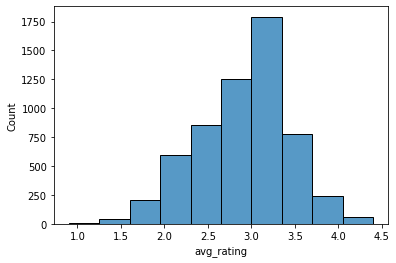

In [24]:
sns.histplot(data = df_scifi, x='avg_rating', bins=10)
plt.show()

In [25]:
#df_thriller info and missing values

In [26]:
df_thriller.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,12836,12833.000000,12802,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000
unique,11990,NaN,7668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Missing,NaN,Alfred Hitchcock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.998831,NaN,98.254986,7473.757089,1422.891088,2.938969,54.903007,118.423496,117.293316,328.195700,355.639140,812.383998,723.173185,948.507012,357.502805,428.523605
std,NaN,20.167857,NaN,25.973443,32415.529590,9362.125019,0.447462,281.126271,494.097765,432.564697,1148.446012,1172.661312,2939.661636,2946.029343,5475.450129,2816.761870,4722.109520
min,NaN,1902.000000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1989.000000,NaN,88.000000,110.000000,10.000000,2.700000,1.000000,3.000000,4.000000,10.000000,10.000000,14.000000,7.000000,4.000000,0.000000,1.000000
50%,NaN,2007.000000,NaN,95.000000,339.000000,35.500000,3.000000,5.000000,10.000000,11.000000,27.000000,29.000000,48.000000,28.000000,18.000000,3.000000,4.000000
75%,NaN,2014.000000,NaN,107.000000,1826.000000,222.000000,3.200000,18.000000,39.000000,44.000000,117.000000,139.000000,264.000000,183.000000,129.000000,24.000000,25.000000


In [27]:
df_thriller.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,12833.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000
mean,1998.998831,98.254986,7473.757089,1422.891088,2.938969,54.903007,118.423496,117.293316,328.195700,355.639140,812.383998,723.173185,948.507012,357.502805,428.523605
std,20.167857,25.973443,32415.529590,9362.125019,0.447462,281.126271,494.097765,432.564697,1148.446012,1172.661312,2939.661636,2946.029343,5475.450129,2816.761870,4722.109520
min,1902.000000,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,88.000000,110.000000,10.000000,2.700000,1.000000,3.000000,4.000000,10.000000,10.000000,14.000000,7.000000,4.000000,0.000000,1.000000
50%,2007.000000,95.000000,339.000000,35.500000,3.000000,5.000000,10.000000,11.000000,27.000000,29.000000,48.000000,28.000000,18.000000,3.000000,4.000000
75%,2014.000000,107.000000,1826.000000,222.000000,3.200000,18.000000,39.000000,44.000000,117.000000,139.000000,264.000000,183.000000,129.000000,24.000000,25.000000
max,2021.000000,803.000000,712015.000000,286934.000000,4.600000,10251.000000,14296.000000,9557.000000,27060.000000,25535.000000,58742.000000,53357.000000,136870.000000,90025.000000,243931.000000


In [28]:
df_thriller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12836 entries, 0 to 12835
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            12836 non-null  object 
 1   year             12833 non-null  float64
 2   director         12802 non-null  object 
 3   running_time     12836 non-null  int64  
 4   views            12836 non-null  int64  
 5   likes            12836 non-null  int64  
 6   avg_rating       12836 non-null  float64
 7   half_star        12836 non-null  int64  
 8   one_star         12836 non-null  int64  
 9   one_half_star    12836 non-null  int64  
 10  two_star         12836 non-null  int64  
 11  two_half_star    12836 non-null  int64  
 12  three_star       12836 non-null  int64  
 13  three_half_star  12836 non-null  int64  
 14  four_star        12836 non-null  int64  
 15  four_half_star   12836 non-null  int64  
 16  five_star        12836 non-null  int64  
dtypes: float64(2

In [29]:
df_thriller['title'].nunique()

11990

In [30]:
df_thriller.isna().sum()

title               0
year                3
director           34
running_time        0
views               0
likes               0
avg_rating          0
half_star           0
one_star            0
one_half_star       0
two_star            0
two_half_star       0
three_star          0
three_half_star     0
four_star           0
four_half_star      0
five_star           0
dtype: int64

In [31]:
df_thriller['title'][df_thriller['year'].isna()]

2906                                     Keep on Swinging
3113    The Very Best of Ghost Hunters: Vol. 1: Most B...
3716                                Frozen 2: Even Better
Name: title, dtype: object

In [32]:
df_thriller['avg_rating'].mean()

2.938968526020537

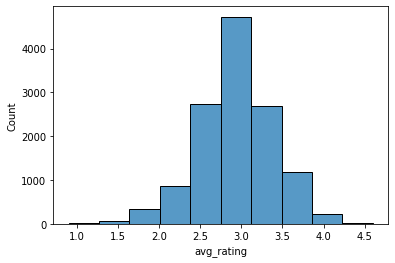

In [33]:
sns.histplot(data = df_thriller, x='avg_rating', bins=10)
plt.show()

In [34]:
#df_war EDA

In [35]:
df_war.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,2180,2179.000000,2170,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
unique,2134,NaN,1507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Four Feathers,NaN,Tom Clegg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1980.319872,NaN,103.665138,5288.254128,1171.355046,3.273165,18.188073,37.046789,37.685321,130.633945,161.663303,460.936697,497.704128,810.666514,379.880734,479.450000
std,NaN,28.786779,NaN,39.627242,28239.600545,8372.715348,0.377985,137.532278,196.355380,179.501390,579.905977,663.617026,2077.078584,2385.735529,5036.290064,2819.931390,4197.546171
min,NaN,1896.000000,NaN,1.000000,38.000000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1957.000000,NaN,90.000000,108.750000,12.000000,3.100000,0.000000,1.000000,1.000000,5.000000,7.000000,16.000000,11.000000,8.000000,1.000000,1.000000
50%,NaN,1982.000000,NaN,102.000000,276.000000,36.000000,3.300000,1.000000,3.000000,4.000000,13.000000,17.000000,39.000000,31.000000,24.000000,6.000000,6.000000
75%,NaN,2008.000000,NaN,120.000000,1086.500000,158.000000,3.500000,4.000000,11.000000,12.000000,41.000000,56.000000,146.000000,128.000000,122.000000,33.000000,32.000000


In [36]:
df_war.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,2179.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,1980.319872,103.665138,5288.254128,1171.355046,3.273165,18.188073,37.046789,37.685321,130.633945,161.663303,460.936697,497.704128,810.666514,379.880734,479.450000
std,28.786779,39.627242,28239.600545,8372.715348,0.377985,137.532278,196.355380,179.501390,579.905977,663.617026,2077.078584,2385.735529,5036.290064,2819.931390,4197.546171
min,1896.000000,1.000000,38.000000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1957.000000,90.000000,108.750000,12.000000,3.100000,0.000000,1.000000,1.000000,5.000000,7.000000,16.000000,11.000000,8.000000,1.000000,1.000000
50%,1982.000000,102.000000,276.000000,36.000000,3.300000,1.000000,3.000000,4.000000,13.000000,17.000000,39.000000,31.000000,24.000000,6.000000,6.000000
75%,2008.000000,120.000000,1086.500000,158.000000,3.500000,4.000000,11.000000,12.000000,41.000000,56.000000,146.000000,128.000000,122.000000,33.000000,32.000000
max,2020.000000,540.000000,584639.000000,218416.000000,4.500000,4630.000000,3942.000000,3364.000000,9072.000000,9554.000000,39888.000000,42185.000000,101558.000000,65594.000000,113894.000000


In [37]:
df_war.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2180 non-null   object 
 1   year             2179 non-null   float64
 2   director         2170 non-null   object 
 3   running_time     2180 non-null   int64  
 4   views            2180 non-null   int64  
 5   likes            2180 non-null   int64  
 6   avg_rating       2180 non-null   float64
 7   half_star        2180 non-null   int64  
 8   one_star         2180 non-null   int64  
 9   one_half_star    2180 non-null   int64  
 10  two_star         2180 non-null   int64  
 11  two_half_star    2180 non-null   int64  
 12  three_star       2180 non-null   int64  
 13  three_half_star  2180 non-null   int64  
 14  four_star        2180 non-null   int64  
 15  four_half_star   2180 non-null   int64  
 16  five_star        2180 non-null   int64  
dtypes: float64(2),

In [38]:
df_war['title'].nunique()

2134

In [39]:
df_war.isna().sum()

title               0
year                1
director           10
running_time        0
views               0
likes               0
avg_rating          0
half_star           0
one_star            0
one_half_star       0
two_star            0
two_half_star       0
three_star          0
three_half_star     0
four_star           0
four_half_star      0
five_star           0
dtype: int64

In [40]:
df_war['title'][df_war['year'].isna()]

518    Frozen 2: Even Better
Name: title, dtype: object

In [41]:
df_war['avg_rating'].mean()

3.2731651376146833

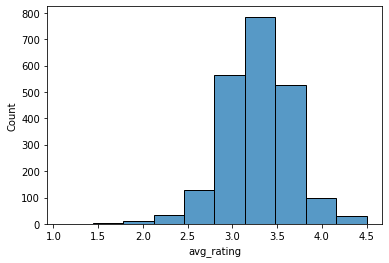

In [42]:
sns.histplot(data = df_war, x='avg_rating', bins=10)
plt.show()

In [43]:
#df_animation EDA

In [44]:
df_animation.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,8123,8117.000000,7909,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
unique,7996,NaN,3630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Cinderella,NaN,Chuck Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1987.235555,NaN,40.215807,5574.548320,1029.206205,3.219993,26.816078,53.858180,49.394189,159.230703,178.719685,494.971808,418.605441,614.074726,218.986458,358.851286
std,NaN,29.929833,NaN,52.810033,32810.409398,7866.939311,0.383906,225.141093,329.424902,271.258463,830.414109,872.042594,2608.639808,2390.891234,4489.385820,1976.451042,3718.157477
min,NaN,1885.000000,NaN,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1961.000000,NaN,7.000000,110.500000,13.000000,3.000000,0.000000,1.000000,1.000000,4.000000,6.000000,13.000000,8.000000,6.000000,1.000000,2.000000
50%,NaN,2000.000000,NaN,13.000000,231.000000,31.000000,3.300000,1.000000,3.000000,3.000000,9.000000,12.000000,28.000000,19.000000,17.000000,4.000000,6.000000
75%,NaN,2013.000000,NaN,75.500000,740.000000,108.000000,3.400000,5.000000,9.000000,9.000000,25.000000,34.000000,83.000000,64.000000,60.000000,16.000000,24.000000


In [45]:
df_animation.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,8117.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,1987.235555,40.215807,5574.548320,1029.206205,3.219993,26.816078,53.858180,49.394189,159.230703,178.719685,494.971808,418.605441,614.074726,218.986458,358.851286
std,29.929833,52.810033,32810.409398,7866.939311,0.383906,225.141093,329.424902,271.258463,830.414109,872.042594,2608.639808,2390.891234,4489.385820,1976.451042,3718.157477
min,1885.000000,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1961.000000,7.000000,110.500000,13.000000,3.000000,0.000000,1.000000,1.000000,4.000000,6.000000,13.000000,8.000000,6.000000,1.000000,2.000000
50%,2000.000000,13.000000,231.000000,31.000000,3.300000,1.000000,3.000000,3.000000,9.000000,12.000000,28.000000,19.000000,17.000000,4.000000,6.000000
75%,2013.000000,75.500000,740.000000,108.000000,3.400000,5.000000,9.000000,9.000000,25.000000,34.000000,83.000000,64.000000,60.000000,16.000000,24.000000
max,2020.000000,897.000000,561682.000000,232066.000000,4.600000,12506.000000,10294.000000,6896.000000,16922.000000,15504.000000,47174.000000,45027.000000,95365.000000,71034.000000,151015.000000


In [46]:
df_animation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            8123 non-null   object 
 1   year             8117 non-null   float64
 2   director         7909 non-null   object 
 3   running_time     8123 non-null   int64  
 4   views            8123 non-null   int64  
 5   likes            8123 non-null   int64  
 6   avg_rating       8123 non-null   float64
 7   half_star        8123 non-null   int64  
 8   one_star         8123 non-null   int64  
 9   one_half_star    8123 non-null   int64  
 10  two_star         8123 non-null   int64  
 11  two_half_star    8123 non-null   int64  
 12  three_star       8123 non-null   int64  
 13  three_half_star  8123 non-null   int64  
 14  four_star        8123 non-null   int64  
 15  four_half_star   8123 non-null   int64  
 16  five_star        8123 non-null   int64  
dtypes: float64(2),

In [47]:
df_animation['title'].nunique()

7996

In [48]:
df_animation.isna().sum()

title                0
year                 6
director           214
running_time         0
views                0
likes                0
avg_rating           0
half_star            0
one_star             0
one_half_star        0
two_star             0
two_half_star        0
three_star           0
three_half_star      0
four_star            0
four_half_star       0
five_star            0
dtype: int64

In [49]:
df_animation['title'][df_animation['year'].isna()]

1111    Despicable Me: Minion Mayhem 3D
1460                            The Box
1585                         Tangled Up
3787                    The Slug Finger
5806                        No Monsters
6097                       Being Pretty
Name: title, dtype: object

In [50]:
df_animation['avg_rating'].mean()

3.2199926135663937

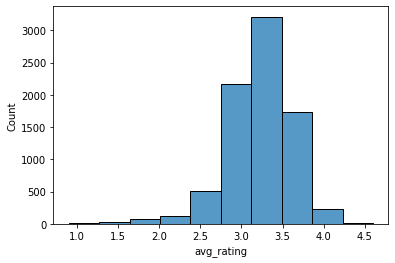

In [51]:
sns.histplot(data = df_animation, x='avg_rating', bins=10)
plt.show()

In [52]:
# data exploration conclusions: director is the column missing the most values, some non unique titles
# but distribution of films and ratings seems even across all dataframes

In [53]:
# drop columns with where either director or year is missing
# drop columns with non unique titles but check first whether the other features are different (different films with same title)
#maybe unique movies aren't important

In [54]:
# add genre column to each dataframe
df_horror['genre'] = 'horror'
df_horror.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror


In [55]:
df_scifi['genre'] = 'scifi'
df_scifi.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,Spider-Man: Into the Spider-Verse,2018.0,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471056,231832,4.4,275,585,330,1923,2178,13916,22153,84260,70990,150869,scifi
1,Alien,1979.0,Ridley Scott,117,379337,130733,4.3,145,442,299,1974,1961,13690,17632,60239,38044,81236,scifi
2,Captain Marvel,2019.0,"Ryan Fleck,Anna Boden",124,337033,77294,3.2,2696,5803,5852,22166,25424,59095,43511,42337,9313,16662,scifi
3,Captain America: The Winter Soldier,2014.0,"Anthony Russo,Joe Russo",136,479385,128919,3.8,803,2739,1700,10378,10092,42585,40745,77448,30175,40600,scifi
4,Guardians of the Galaxy Vol. 2,2017.0,James Gunn,137,477059,131595,3.6,1031,3076,2661,14156,16423,61710,56068,79567,20530,27144,scifi


In [56]:
df_thriller['genre'] = 'thriller'
df_thriller.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,Parasite,2019.0,Bong Joon-ho,133,539266,283450,4.6,308,427,289,1266,1640,8667,14524,69003,90025,243931,thriller
1,Psycho,1960.0,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548,thriller
2,Zodiac,2007.0,David Fincher,157,332010,92781,4.0,209,658,530,3354,3933,21210,29126,66992,32046,35479,thriller
3,John Wick,2014.0,Chad Stahelski,101,352567,105748,3.8,532,1442,1208,5613,7382,31924,42776,76837,22639,29258,thriller
4,Reservoir Dogs,1992.0,Quentin Tarantino,99,386953,125137,4.1,226,598,463,2473,2757,16449,24906,76472,44053,52923,thriller


In [57]:
df_war['genre'] = 'war'
df_war.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,Inglourious Basterds,2009.0,Quentin Tarantino,153,584639,218416,4.3,424,1085,668,4025,3847,24156,29023,101558,65594,113894,war
1,Paths of Glory,1957.0,Stanley Kubrick,88,74359,23556,4.3,15,47,48,201,322,1878,3824,13053,12624,14826,war
2,Fury,2014.0,David Ayer,135,145217,29977,3.6,216,577,731,3230,5035,17210,20721,24578,6229,5697,war
3,Gone with the Wind,1939.0,"Victor Fleming,George Cukor,Sam Wood",233,90154,17558,3.9,265,536,375,1557,1531,5418,5491,11234,5659,9973,war
4,The Thin Red Line,1998.0,Terrence Malick,171,78597,18011,4.0,112,308,222,1183,1260,4699,5793,12125,7407,9363,war


In [58]:
df_animation['genre'] = 'animation'
df_animation.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,Spider-Man: Into the Spider-Verse,2018.0,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471600,232066,4.4,275,585,329,1929,2184,13931,22173,84347,71034,151015,animation
1,Finding Dory,2016.0,"Andrew Stanton,Angus MacLane",97,314142,53703,3.4,596,2015,2265,10899,12850,40274,32828,35851,7063,12065,animation
2,Wreck-It Ralph,2012.0,Rich Moore,101,319694,64101,3.6,301,1052,1026,5811,7991,32348,33237,45608,11007,13740,animation
3,How to Train Your Dragon,2010.0,"Chris Sanders,Dean DeBlois",100,308058,68214,3.9,191,558,473,2938,4053,20622,24824,47324,15769,21894,animation
4,Tangled,2010.0,"Byron Howard,Nathan Greno",100,318687,64472,3.7,278,888,892,4907,6348,25919,25467,39242,11317,21929,animation


In [59]:
df_genres = df_horror.append(df_scifi)
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16879 entries, 0 to 5826
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            16879 non-null  object 
 1   year             16869 non-null  float64
 2   director         16755 non-null  object 
 3   running_time     16879 non-null  int64  
 4   views            16879 non-null  int64  
 5   likes            16879 non-null  int64  
 6   avg_rating       16879 non-null  float64
 7   half_star        16879 non-null  int64  
 8   one_star         16879 non-null  int64  
 9   one_half_star    16879 non-null  int64  
 10  two_star         16879 non-null  int64  
 11  two_half_star    16879 non-null  int64  
 12  three_star       16879 non-null  int64  
 13  three_half_star  16879 non-null  int64  
 14  four_star        16879 non-null  int64  
 15  four_half_star   16879 non-null  int64  
 16  five_star        16879 non-null  int64  
 17  genre        

In [60]:
df_genres = df_genres.append(df_thriller)
df_genres = df_genres.append(df_war)
df_genres = df_genres.append(df_animation)
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40018 entries, 0 to 8122
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            40018 non-null  object 
 1   year             39998 non-null  float64
 2   director         39636 non-null  object 
 3   running_time     40018 non-null  int64  
 4   views            40018 non-null  int64  
 5   likes            40018 non-null  int64  
 6   avg_rating       40018 non-null  float64
 7   half_star        40018 non-null  int64  
 8   one_star         40018 non-null  int64  
 9   one_half_star    40018 non-null  int64  
 10  two_star         40018 non-null  int64  
 11  two_half_star    40018 non-null  int64  
 12  three_star       40018 non-null  int64  
 13  three_half_star  40018 non-null  int64  
 14  four_star        40018 non-null  int64  
 15  four_half_star   40018 non-null  int64  
 16  five_star        40018 non-null  int64  
 17  genre        

In [61]:
# EDA of new dataframe 
df_genres.to_csv('df_genres.csv')

In [62]:
df_genres.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror


In [63]:
df_genres.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
count,40018,39998.00000,39636,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018
unique,30378,NaN,16292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Frankenstein,NaN,Chuck Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thriller
freq,18,NaN,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12836
mean,NaN,1994.90747,NaN,80.726548,6826.995702,1316.224424,2.972707,54.423484,111.778300,105.667125,293.829577,309.652281,720.899595,614.732420,820.867235,299.167150,403.334599,NaN
std,NaN,23.84132,NaN,42.044645,34009.245241,9260.254979,0.473895,329.131089,570.423667,474.780097,1275.813010,1253.326690,3208.731177,2979.839044,5347.700701,2518.510737,4304.396370,NaN
min,NaN,1885.00000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1982.00000,NaN,73.000000,109.250000,11.000000,2.700000,1.000000,2.000000,3.000000,8.000000,8.000000,13.000000,7.000000,4.000000,1.000000,1.000000,NaN
50%,NaN,2004.00000,NaN,90.000000,288.000000,34.000000,3.000000,4.000000,8.000000,9.000000,20.000000,21.000000,36.000000,22.000000,15.000000,3.000000,4.000000,NaN
75%,NaN,2014.00000,NaN,100.000000,1271.000000,165.000000,3.300000,16.000000,31.000000,33.000000,82.000000,90.000000,172.000000,113.000000,87.000000,18.000000,22.000000,NaN


In [64]:
df_genres['genre'].value_counts()

thriller     12836
horror       11052
animation     8123
scifi         5827
war           2180
Name: genre, dtype: int64

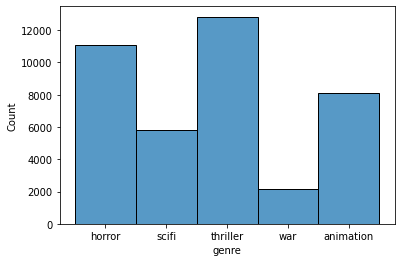

In [65]:
sns.histplot(data = df_genres, x='genre')
plt.show()

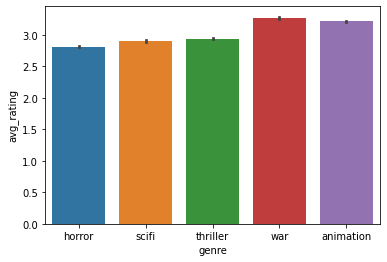

In [66]:
sns.barplot(data = df_genres, x='genre', y='avg_rating')
plt.show()
# plt.bar(df_genres['genre'],df_genres['avg_rating'])
# plt.show()

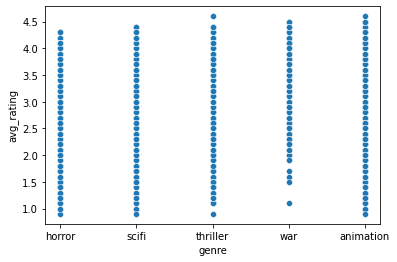

In [67]:
sns.scatterplot(data = df_genres, x='genre', y='avg_rating')
plt.show()

In [68]:
#data cleaning

In [69]:
df_genres.isna().sum()

title                0
year                20
director           382
running_time         0
views                0
likes                0
avg_rating           0
half_star            0
one_star             0
one_half_star        0
two_star             0
two_half_star        0
three_star           0
three_half_star      0
four_star            0
four_half_star       0
five_star            0
genre                0
dtype: int64

In [70]:
# new columns with missing year and director data

In [71]:
# df_genres['year_isna'] = df_genres['year'].isna()
# df_genres['year_isna'].sum()

# df_genres['year'] = df_genres['year'].fillna(df_genres['year'].median())
# df_genres.isna().sum()
df_genres['year'] = df_genres['year'].fillna(df_genres['year'].mean())

In [72]:
df_genres['director'] = df_genres['director'].fillna('directorNA')
df_genres.isna().sum()

title              0
year               0
director           0
running_time       0
views              0
likes              0
avg_rating         0
half_star          0
one_star           0
one_half_star      0
two_star           0
two_half_star      0
three_star         0
three_half_star    0
four_star          0
four_half_star     0
five_star          0
genre              0
dtype: int64

In [73]:
# drop half stars

In [74]:
df_genres = df_genres.drop(labels=['half_star', 'one_half_star', 'two_half_star', 'three_half_star', 'four_half_star'], axis=1)

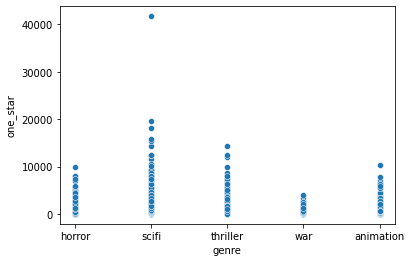

In [75]:
# check star distributions
sns.scatterplot(data = df_genres, x='genre', y='one_star')
plt.show()

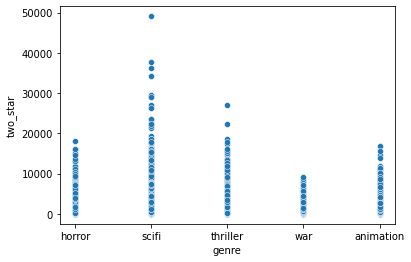

In [76]:
sns.scatterplot(data = df_genres, x='genre', y='two_star')
plt.show()

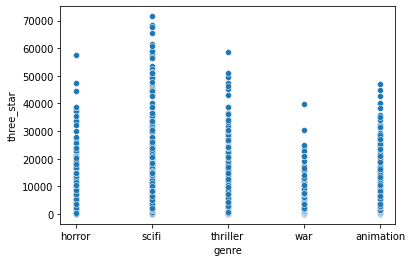

In [77]:
sns.scatterplot(data = df_genres, x='genre', y='three_star')
plt.show()

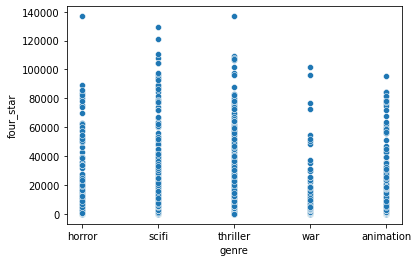

In [78]:
sns.scatterplot(data = df_genres, x='genre', y='four_star')
plt.show()

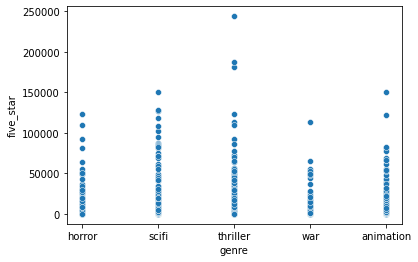

In [79]:
sns.scatterplot(data = df_genres, x='genre', y='five_star')
plt.show()

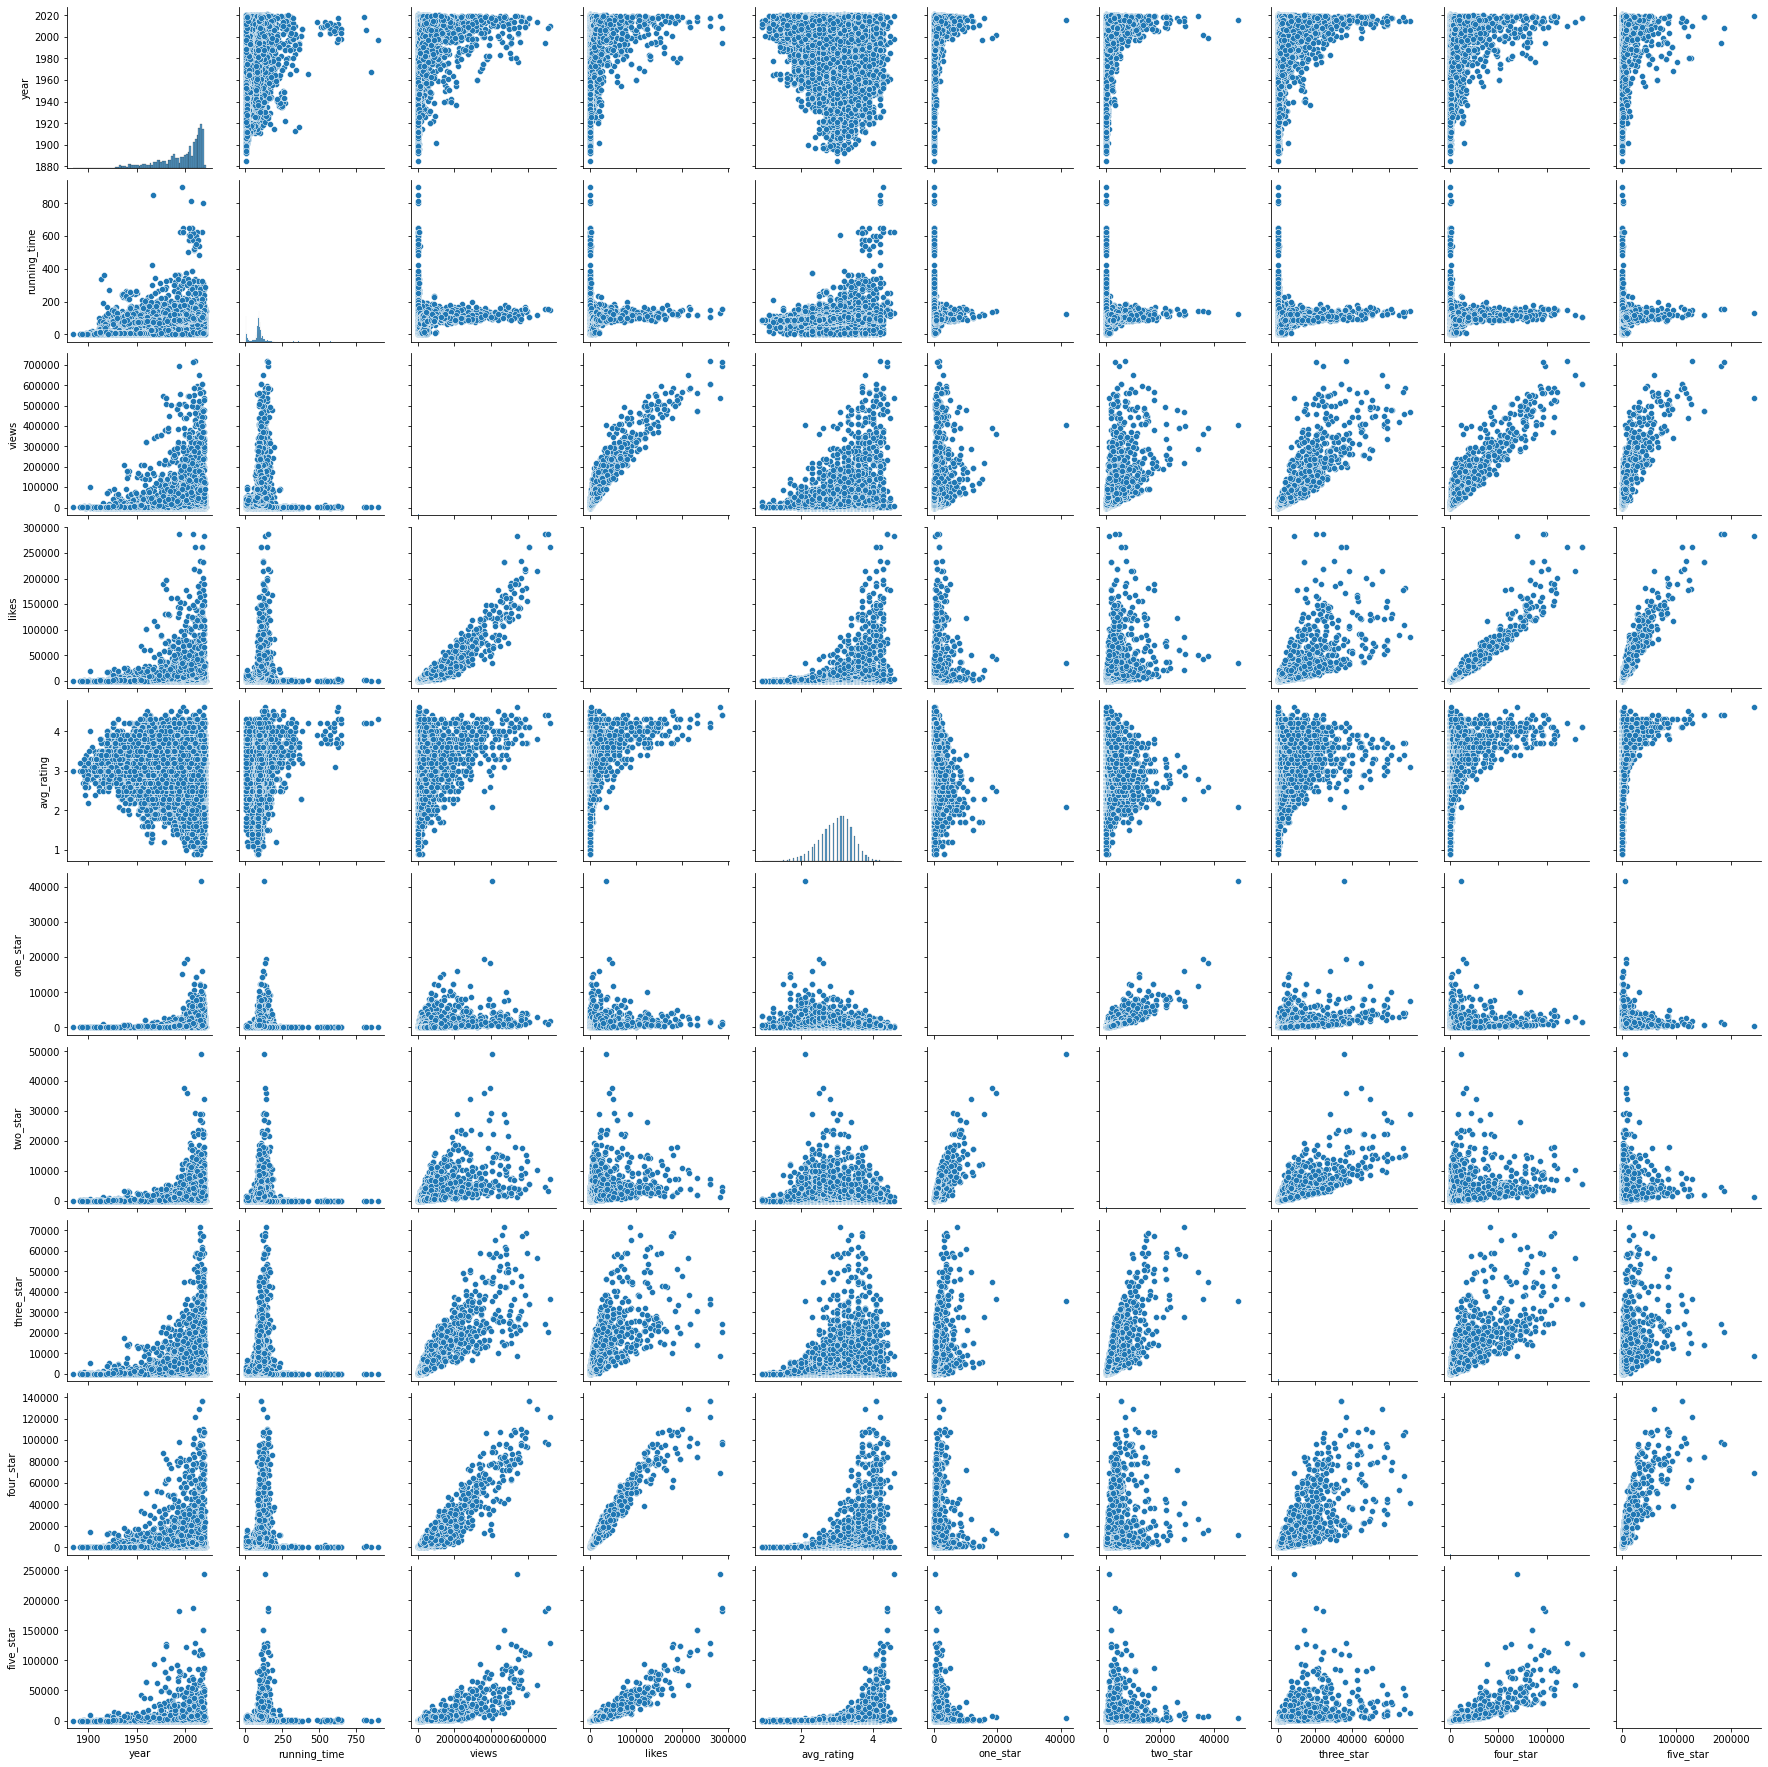

In [80]:
sns.pairplot(df_genres)

In [ ]:
df_genres.to_csv('genres.csv')

In [81]:
# conclusion: significant outliers for each genre that should be normalized or dropped